# Lec04 - Visualization and Univariate Linear Regressions

- Section 0. Loading the data with quick preprocessing.
- Section 1. Summarizing two variables (continued)
  - Visualization
  - Covariance and Correlation
- Section 2. Univariate regression.
  - Example 1. X and Y (X is continuous)
  - Example 2. X and Y (X is binary discrete)

We will use Matplotlib for visualization and statsmodels.api for regression. Today's lab session includes three small exercises to facilitate the practice.

## Section 0. Loading the data

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this is the new module we will use today for linear regression
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load the csv file using pandas
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)

In [3]:
df

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,15742.0,15742.0,7957.0,7785.0,41.0,5517.0,15742.0,13894.0,1128.0,64.0,...,0.000000,0.062212,0.164241,0.084891,0.002066,0.251197,0.401551,0.426820,1.217872,0.099118
4163,5723.0,5723.0,2914.0,2809.0,43.0,2001.0,5723.0,4664.0,482.0,0.0,...,0.017050,0.047581,0.215161,0.084563,0.007005,0.306730,0.411036,0.440678,1.260370,0.039827
4164,10342.0,10342.0,4657.0,5685.0,37.6,3746.0,10342.0,7956.0,1351.0,13.0,...,0.000000,0.038862,0.137002,0.030591,0.002049,0.169643,0.353295,0.482692,1.332621,0.041208
4165,8960.0,8960.0,4166.0,4794.0,37.2,3324.0,8960.0,6286.0,1831.0,0.0,...,0.024021,0.064132,0.174399,0.063014,0.003126,0.240540,0.363482,0.478571,1.290012,0.017440


**Preprocessing** Creating a discrete independent variable (high vs. low income groups).

In [4]:
# create columns: high_inc and low_inc - [x<50000, 50000<x]; 50000 is an arbitrary threshold
# 1. creating three separate columns
df['high_inc'] = df['inc_median_household'] > 50000
df['low_inc'] = df['inc_median_household'] <= 50000
df['high_inc']

0        True
1       False
2       False
3       False
4        True
        ...  
4162     True
4163     True
4164     True
4165     True
4166    False
Name: high_inc, Length: 4167, dtype: bool

In [5]:
# 2. creating one column with two values
df['inc_median_household_discrete'] = 1 # assigning the medium income group
df.loc[df['inc_median_household'] < 50000, 'inc_median_household_discrete'] = 0 # assigning the low income group
df['inc_median_household_discrete']

0       1
1       0
2       0
3       0
4       1
       ..
4162    1
4163    1
4164    1
4165    1
4166    0
Name: inc_median_household_discrete, Length: 4167, dtype: int64

## Section 1. Summarizing two variables (review)

**Box Plot**

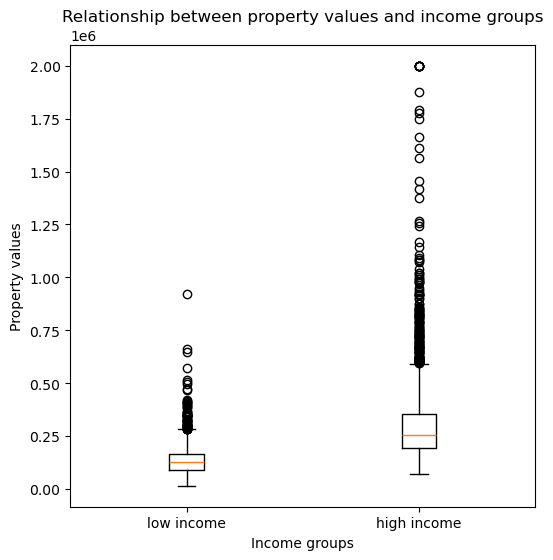

In [6]:
# box plot for the continuous property values and discrete income groups.
# prepare the data
df_two_income_groups = [df.loc[df['low_inc'], 'property_value_median'].values,
                          df.loc[df['high_inc'], 'property_value_median'].values]

#
plt.figure(figsize = (6, 6))
plt.boxplot(df_two_income_groups, labels = ['low income', 'high income'])
plt.xlabel('Income groups')
plt.ylabel('Property values')
plt.title("Relationship between property values and income groups")
plt.show()

**Scatter plot**

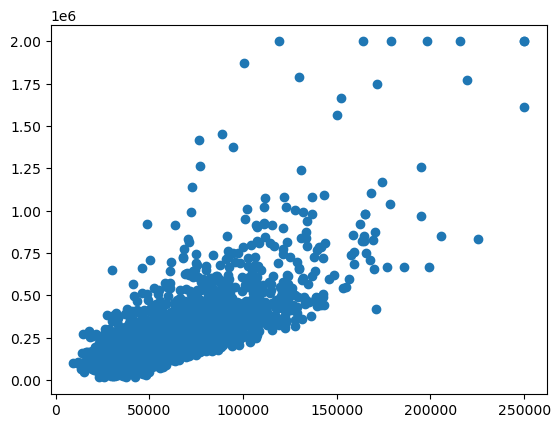

In [7]:
# scatter plot without formating
plt.scatter(df['inc_median_household'], df['property_value_median'])

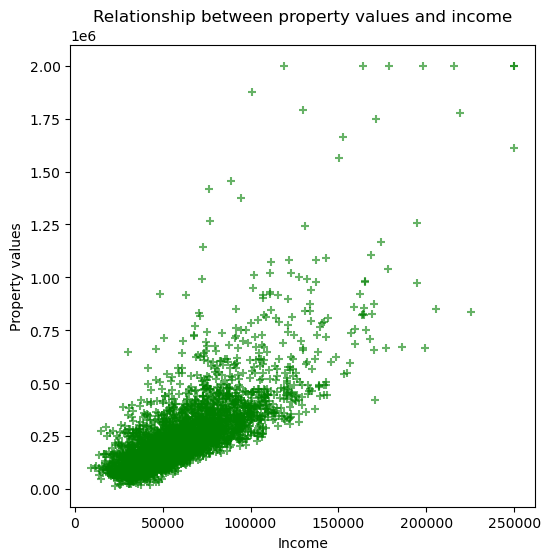

In [8]:
# scatter plot with formating
plt.figure(figsize = (6, 6))
plt.scatter(df['inc_median_household'], df['property_value_median'], color = 'green', marker='+', alpha = 0.6)
plt.xlabel('Income')
plt.ylabel('Property values')
plt.title("Relationship between property values and income")
plt.show()

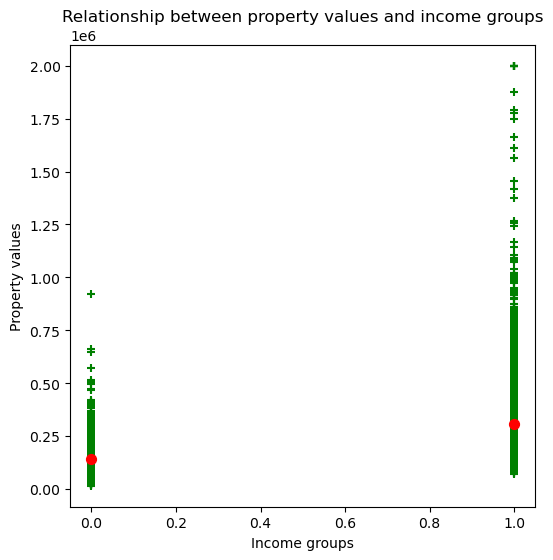

In [9]:
# scatter plot for discrete income group variable.
# this is the figure on the lecture notes.
plt.figure(figsize = (6, 6))
plt.scatter(df['inc_median_household_discrete'], df['property_value_median'], color = 'green', marker='+')
plt.scatter([0,1], df.groupby('inc_median_household_discrete')['property_value_median'].mean(), color = 'red', s = 50) # plot the conditional mean values for the three income groups.
plt.xlabel('Income groups')
plt.ylabel('Property values')
plt.title("Relationship between property values and income groups")
plt.show()

**Summarizing covariance and correlation**

In [10]:
# variance-covariance matrix. Unfortunately the intuition is limited because of the magnitude.
df[['inc_median_household','property_value_median']].cov()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,inc_median_household,property_value_median
inc_median_household,6.881619e+08,3.573725e+09
property_value_median,3.573725e+09,3.268235e+10


In [11]:
# correlation matrix. Providing much better intuition: property values and median household income are highly correlated.
df[['inc_median_household','property_value_median']].corr()

,inc_median_household,property_value_median
inc_median_household,1.000000,0.753562
property_value_median,0.753562,1.000000


## **Exercise** Identify the ratio of driving and public transit. Compute their correlation coefficient, and draw the scatter plot for them. Are they positively or negatively correlated? Is this result intuitive?

## **Exercise** Identify the median property values and rent. Compute their correlation coefficient, and draw the scatter plot for them. Are they positively or negatively correlated? Is this result intuitive?

## Section 2. Linear regression

- Property value depends on many factors - but let's start with income.

### Linear Regression 1. Using a continuous variable as the independent variable.

In [12]:
# choose the independent variable
X = df['inc_median_household']
# add a constant to the independent variable
X = sm.add_constant(X)

In [13]:
# view the independent variables
X

,const,inc_median_household
0,1.0,53533.0
1,1.0,33958.0
2,1.0,40250.0
3,1.0,39962.0
4,1.0,63889.0
...,...,...
4162,1.0,76846.0
4163,1.0,72344.0
4164,1.0,65786.0
4165,1.0,59236.0


In [14]:
# choose the dependent var
y = df['property_value_median']

In [15]:
# fitting the model.
# launch the model using the independent and dependent variables
model = sm.OLS(y, X)
# fitting the model
results = model.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [16]:
# report the parameters
print("Parameters: ", results.params)

Parameters:  const                  -71696.096753
inc_median_household        5.193146
dtype: float64


In [17]:
# report the model fit (R2)
print("R2: ", results.rsquared)

R2:  0.5678562456275715


In [18]:
# report the predictions
results.predict()

array([206308.57193843, 104652.74488535, 137328.0176219 , ...,
       269940.18618525, 235925.08185842, 171732.60787614])

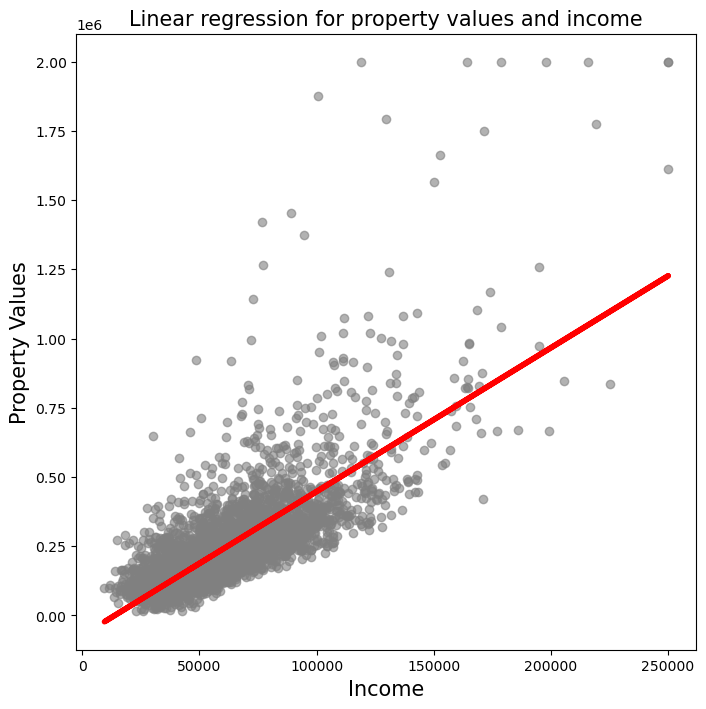

In [19]:
# Comparing the predicted and true values
# plot the fitted line
property_value_predicted = results.predict()

# another way to plot
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(df['inc_median_household'], df['property_value_median'], color = 'grey', alpha = 0.6)
ax.plot(df['inc_median_household'], property_value_predicted, color = 'red', lw = 4)
ax.set_xlabel('Income', fontsize = 15)
ax.set_ylabel('Property Values', fontsize = 15)
ax.set_title('Linear regression for property values and income', fontsize = 15)
plt.show()

In [20]:
# report the results.
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.568
Model:                               OLS   Adj. R-squared:                  0.568
Method:                    Least Squares   F-statistic:                     5473.
Date:                   Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                           10:56:54   Log-Likelihood:                -54606.
No. Observations:                   4167   AIC:                         1.092e+05
Df Residuals:                       4165   BIC:                         1.092e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Linear Regression 2. Using a discrete variable as the independent variable.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


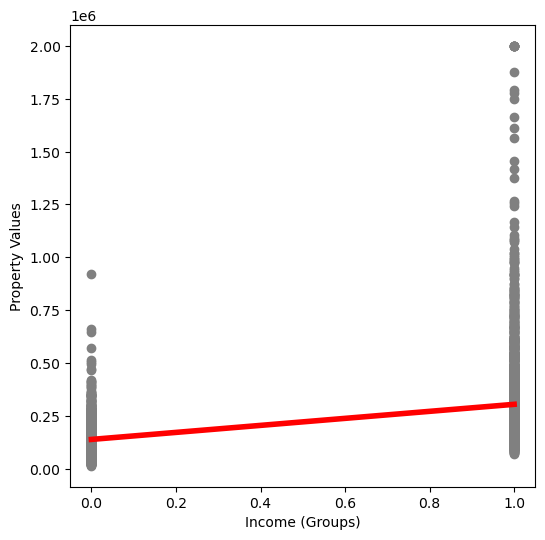

In [21]:
# Using the discrete income groups as an example.
# choose the independent variable
X = df['inc_median_household_discrete']
X = sm.add_constant(X)
y = df['property_value_median']
model = sm.OLS(y, X)
results = model.fit()
# results.predict()

# Comparing the predicted and true values
# plot the fitted line
property_value_predicted = results.predict()

# another way to plot
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(df['inc_median_household_discrete'], df['property_value_median'], color = 'grey')
ax.plot(df['inc_median_household_discrete'], property_value_predicted, color = 'red', lw = 4)
ax.set_xlabel('Income (Groups)')
ax.set_ylabel('Property Values')
plt.show()

In [22]:
# print the parameters
print("Parameters: ", results.params)

Parameters:  const                            140043.126464
inc_median_household_discrete    165838.454260
dtype: float64


In [23]:
# how to think about the parameter?
# compute the average property values for the two groups
low_income_average, high_income_average = df.groupby('inc_median_household_discrete')['property_value_median'].mean()
print("Property values from low and high income groups are:", low_income_average, high_income_average)

Property values from low and high income groups are: 140043.12646370023 305881.5807238715


In [24]:
# compute the property value differences between the two groups
property_value_gap_high_low = high_income_average - low_income_average
print("Property value difference between the low and high income groups: ", property_value_gap_high_low)

Property value difference between the low and high income groups:  165838.45426017125


In [25]:
# Summarize the regression results.
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.204
Model:                               OLS   Adj. R-squared:                  0.203
Method:                    Least Squares   F-statistic:                     1065.
Date:                   Thu, 07 Dec 2023   Prob (F-statistic):          3.57e-208
Time:                           10:56:56   Log-Likelihood:                -55880.
No. Observations:                   4167   AIC:                         1.118e+05
Df Residuals:                       4165   BIC:                         1.118e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

### **Exercise 3** Run a regression using the ratio of driving as the dependent variable and household income as the independent variable. Report R square and parameters, and print the OLS regression results.